We need to estimate a parameter from a model. Generally, we select a model — let’s say a linear regression — and use observed data $x_i$ to create the model’s parameters $\theta$.

#### How are the parameters actually estimated?

For example, if we are sampling a random variable which we assume to be normally distributed some mean $\mu$ and standard deviation $\sigma$. Our goal is to find estimations of $\mu$ and $\sigma$ from our sample which accurately represent the true $x$, not just the samples we’ve drawn out.

Consider when you’re doing a linear regression, and your model estimates the coefficients for $x_i$ on the dependent variable $y_i$. How do we maximize the likelihood (probability) our estimator $\theta$ is from the true $x$? And, once you have the sample value how do you know it is correct?

Consider the Gaussian PDF:
$$\Large p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\ e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

Suppose we measure a data value $x_i$ = 3. What is the probability of the underlying distribution having $\mu = 3$ and  $\sigma = 1$?

In [1]:
import numpy as np
from scipy import stats
print(stats.norm.pdf(3, 3, 1))

0.3989422804014327


But this is the wrong way to think about probability for our model. We should really ask:

#### What is the probability of our model (or null hypothesis: $\mu = 3$ and  $\sigma = 1$) producing a value of 3 or greater?

This is the p-value.

To measure the p-value, we need the z-score:

$$z-score = \frac{x_i- \mu}{\sigma}$$

In our simple case, the z-score us zero. Given this z-score, the p-value gives us the probability of observing the value of $3$ or greater, given the known null hypothesis. In other words, we want the area under the PDF which is colored white in the following image:

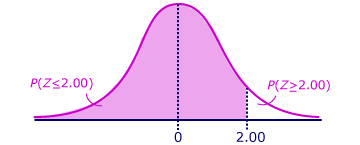

In [2]:
from IPython.display import Image
Image(filename='pvalue.png') 

In [3]:
print('p-value = ', 1-stats.norm.cdf(3, 3, 1))

('p-value = ', 0.5)


What about observing the value 2? or 6?\

In [4]:
print('p-value = ', 1-stats.norm.cdf(2, 3, 1))
print('p-value = ', 1-stats.norm.cdf(6, 3, 1))

('p-value = ', 0.8413447460685429)
('p-value = ', 0.0013498980316301035)


#### In statistics, we REJECT THE NULL. We do NOT accept the NULL. [Read more here](https://blog.minitab.com/blog/understanding-statistics/things-statisticians-say-failure-to-reject-the-null-hypothesis)

In the latter case ($x_i = 6$), we would reject the NULL Hypothesis.

Again, we do NOT accept the null hypothesis (i.e., for $x_i = 2$ or $x_i = 3$, we just do not reject it).

A small p-value means that the assumed model is unlikely to be true. In long-run frequentist statistics the p-value would relate to the fraction of experiments that would not meet the null hypothesis, thus we would need a new hypothesis to test.

Let’s assume we get a bunch samples $x_i$ which we know to come from some normal distribution, and all are mutually independent from each other. 

If this is the case, the total probability of observing all of the data is the product of obtaining each data point individually. 

So if we want to see the probability of observing values of 2 (or greater) and 6 (or greater) if the underlying hypothesis is a distribution with $\mu = 3$ and $\sigma  = 1$:

In [5]:
print('probability of observing 2 and 6 = ', stats.norm.pdf(2, 3, 1)*stats.norm.pdf(6, 3, 1))

('probability of observing 2 and 6 = ', 0.0010723775711956546)


To turn this into a p-value for the model, we need to somehow combine z-scores. We do this with [Fishers Method:](https://en.wikipedia.org/wiki/Fisher%27s_method)

$$\chi^2 = -2\sum_{i=1}^{k} ln(pvalue_i)$$
where $p_i$ are the individual p-values from each z-score and $\chi^2$ is the classic $\chi^2$ distribution.

## Theorem.  
If X is normally distributed with mean μ and variance σ2 > 0, then:

$$V=\left(\frac{x_i−\mu}{\sigma}\right)^2=Z^2$$

is distributed as a chi-square random variable with 1 degree of freedom.

Using the p-values from above, we get:

In [6]:
chi2 = -2*(np.log(1-stats.norm.cdf(2, 3, 1)) + np.log(1-stats.norm.cdf(6, 3, 1)))
print('chi2 =  ',chi2)

('chi2 =  ', 13.560960001067585)


If $\chi^2$ is large, it suggests that the null hypothesis is not true for every test.

In a perfect scenario where all of the null hypotheses are true, and the individual p-values (or their corresponding z-score test statistics) are independent,  Fishers Method has a chi-squared distribution with 2k degrees of freedom, where k is the number of tests being combined. 

In [7]:
print('p-value = ', 1-stats.chi2.cdf(chi2,2))

('p-value = ', 0.001135729616640213)


We should reject the model.

## Maximum Likelihood Estimation (MLE)

The likelihood of a data set given a particular model is the joint probability of each individual data point given the model:

$$ L \equiv p(\{x_i\} \mid M(\theta)) = \prod_{i = 1}^n p(x_i \mid M(\theta)) $$

although it is often useful to deal instead with the log-likelihood:

$$ ln L = \prod_{i = 1}^n \ln (p(x_i \mid M(\theta))) $$

Now if we are interested in determining the best-fit form of a model to a data set, i.e. the best-fit values of a model's parameters, $\theta_i$, to a particular $\{x_i\}$, then the likelihood will obviously be maximized for these values. Thus solving for the $\theta_i, i = 1,...,n$, that maximize the likelihood is one way to determine the optimal fit:

$$  \frac{\partial lnL}{\partial \theta_i}(x_i, \hat{\theta}_i) = 0 $$ 


For our first example, consider the log likelihood for a model producing $n$ observations stemming from a single underlying normal distribution:

$$ln\ f(x;\mu,\sigma^2) = -\frac{n}{2}\ ln(2\pi)\ - \frac{n}{2}\ ln(\sigma^2) - \frac{1}{2\sigma^2}\ \sum(x_i - \mu)^2$$

Suppose we a very simple dataset of $x_i$ values. Let's maximize the likelihood by comparing models. In the beginning, let us just fix sigma and grid over $\mu$:

In [8]:
x = np.array([2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0])

In [9]:
def compare_data_to_dist(x, mu=5,  sd=3):
    ll = 0.0
    for i in x:
        ll = ll + np.log(stats.norm.pdf(i, mu, sd))
    return ll

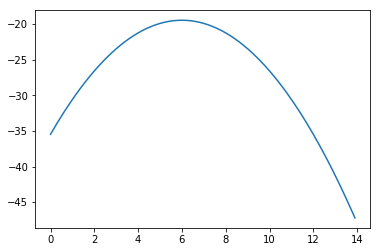

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
sigma = 3
mu = np.arange(0.,14,0.1)
loglike = np.zeros(len(mu))
for i in range(len(mu)):
    loglike[i] = compare_data_to_dist(x, mu=mu[i],  sd=sigma)   
plt.plot(mu,loglike)

The answer is somewhere around 6. 

But we need to do the same thing for the standard deviation of the Normal in the model.

(140, 9)


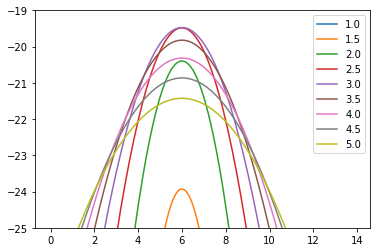

In [11]:
sigma = np.arange(1,5.5,0.5)
mu = np.arange(0.,14,0.1)
loglike = np.zeros((len(mu),len(sigma)))
print np.shape(loglike)
for i in range(len(mu)):
    for j in range(len(sigma)):
        loglike[i,j] = compare_data_to_dist(x, mu=mu[i],  sd=sigma[j])  
for i in range(len(sigma)):
    plt.plot(mu,loglike[:,i], label = str(sigma[i]))
plt.ylim(-25,-19)
plt.legend()
plt.show()

So the answer is $\mu \sim 6$ and $2.5 \le \sigma \le 3.0$. 

We can of course just look at the variance and the mean of the data:

In [12]:
print('mean =', np.mean(x))
print('stdev =', np.std (x))

('mean =', 6.0)
('stdev =', 2.7386127875258306)


For the next example, suppose we want to fit a data set with a power law (Pareto) model of the form, $f = a x_m^{\alpha} / x^{\alpha + 1}$ for $x \ge x_m$. The likelihood is:

$$ L = \prod_{i = 1}^n  \alpha x_m^{\alpha} / x^{\alpha + 1} $$

which gives a log-likelihood of:

$$ \ln lnL = n \ln \alpha + n \alpha \ln x_m - (\alpha + 1) \sum_{i=1}^{n} \ln x_i $$

Finding the extremum gives:

$$ \frac{\partial \ln lnL}{\partial \alpha} = \frac{n}{\alpha} + n \ln x_m - \sum_{i=1}^n \ln x_i = 0 $$

and so:

$$ \hat{\alpha} = \frac{1}{\sum_{i=1}^n \ln x_i / n - \ln x_m} $$


## The Fisher Information Matrix

As the sample size increases, the distribution of the MLE tends to the Gaussian distribution with mean $\theta$ and covariance matrix equal to the inverse of the Fisher information matrix, $\cal{I}(\theta)$, where $\theta$ is the vector of the model parameters. For the Pareto, it is just $\alpha$. 

The Fisher information matrix is given by:

$$ \cal{I}(\theta) = -\mathrm{E} \left[ \frac{\partial^2}{\partial \theta^2} \log f(\theta)  \right]$$

so in the case of the Pareto model, this is:

$$ \cal{I}(\alpha) = \frac{n}{\alpha^2} $$

The (asymptotic) error on the best-fit parameter, $\hat{\alpha}$, is thus given by a Gaussian with mean $\hat{\alpha}$ and variance $\alpha^2 / n$.


## Bayes Theorem

In the mid-eighteenth century, one of the most pressing mathematical problems was how to improve your odds of winning a game of chance:

<blockquote>
<i>"Let us then imagine a person present at the drawing of a lottery, who knows nothing of its scheme or of the proportion of Blanks to Prizes in it. Let it further be supposed, that he is obliged to infer this from the number of blanks he hears drawn compared with the number of prizes; and that it is enquired what conclusions in these circumstances he may reasonably make.</i>

<br/><br/>

<i>Let him first hear ten blanks drawn and one prize, and let it be enquired what chance he will have for being right if he guesses that the proportion of blanks to prizes in the lottery lies somewhere between the proportions of 9 to 1 and 11 to 1."</i>
</blockquote>

<p style="text-align:right">An Essay towards solving a Problem in the Doctrine of Chances by Rev. T. Bayes (1763)</p>

This was the problem of inverse probability, determining the distribution of an unobserved variable given data: in this case, the probability of winning a prize in a lottery. Let's first assume that the probability of winning, $p$, is a random variable uniformly distributed between 0 and 1 (this is probably the most specific statement we can make about it as we have no further information about it). The result of each draw, $X_i$, is then a variable conditional on the value of $p$, such that for a given draw, $p(X = 1) = p$ (for a prize) and $p(X = 0) = (1 - p)$ for a blank, but independent of any other draw. After $n+m$ draws, there will have been $m$ prizes and $n$ blanks which will have a probability density function given by:

$$
f(n,m) = \frac{(n + m)!}{m!n!}p^m(1-p)^n = \left( \frac{n+m}{m} \right) p^m (1-p)^n
$$

The chance that $p$ lies between two values $a$ and $b$ given the observed values of $m$ and $n$ is then:

$$
P(a < p < b \mid m,n) = \frac{\int_a^b \left( \frac{n+m}{m} \right) p^m (1-p)^n dp} {\int_0^1 \left( \frac{n+m}{m} \right) p^m (1-p)^n dp}
$$

where the denominator provides the normalization over all possible values of $p$ so that $P(0 < p < 1) = 1$. You might recognize the normalized integrand as the beta distribution. For $a = 1 / 11, b = 1 / 9, m = 1$ and $n = 10$, this gives a probability of about 0.077 or, as Bayes put it: <i>"there would therefore be an odds of about 923 to 76, or nearly 12 to 1 <b>against</b> his being right"</i>. The results of further draws can also be easily determined, hopefully giving better odds.

Today we would call this an example of statistical inferencing and use Bayesian probability to solve it. The distribution of the data, $n$ and $m$, for a given value of the unobserved variable, $p$, is the likelihood function, $p(D \mid M)$; the initial assumption of the distribution of $p$ is the prior, $p(M)$; the denominator is the marginal likelihood or evidence; and the final result is the posterior probability, $p(M \mid D)$, all of which are related by Bayes' Theorem:

$$ P(M \mid D) = \frac{P(D \mid M) P(M)}{P(D)} $$



## Choice of prior

Often, we assume a uniform distribution or what is normally called a <i>flat prior</i> or an <i>uninformative</i> prior:

$$p(\theta) = const., \,\, a < \theta < b $$

This is the recommendation for a parameter which may take any value in a finite range, or from $-\infty$ to $\infty$. A subtlety with this choice is that it does not describe a state of complete ignorance, but the state of knowledge in which we have observed at least one success and one failure, and have prior knowledge that both states are physically possible.

If the parameter is limited to positive real values then the prior should be uniform in the logarithmic range:

$$p(\theta) \propto \theta^{-1} => p(\ln \theta) = const $$




### Jeffrey's rule

The general recommendation for an uninformative prior is Jeffrey's rule which gives the prior as the square root of the determinant of the <i>Fisher information</i> for the model:

$$p(\theta) \propto \sqrt{\det \cal I(\theta)}$$

where $\cal I(\theta)$ is the second moment (variance) of the partial derivative with respect to $\theta$ of the natural logarithm of the likelihood function for $\theta$:

$$\cal I(\theta) = \mathrm{E} \left[ \left( \frac{\partial}{\partial \theta} \log f(\theta) \right)^2 \right] = -\mathrm{E} \left[ \frac{\partial^2}{\partial \theta^2} \log f(\theta)  \right]$$

For example, if you believe that your data is drawn from a Gaussian distribution with an unknown mean then the likelihood function for the mean is:

$$f(x \mid \mu) = \frac{e^{-(x-\mu)^2/2\sigma^2}}{\sqrt{2\pi\sigma^2}} $$

(with a fixed $\sigma$) and the prior for the mean is:

$$ p(\mu) \propto \sqrt{\mathrm{E}\left[ \left(\frac{x-\mu}{\sigma^2}\right)^2 \right]} = \sqrt{\int_{-\infty}^{+\infty} f(x \mid \mu) \left( \frac{x - \mu}{\sigma^2} \right)^2 dx} = \frac{1}{\sigma}$$

This is just a constant and so the appropriate prior is the uniform distribution.


### Maximum entropy

Of course, what we really want is some measure that captures the <i>information content</i> of a distribution and then assign a prior that reflects our ignorance of the true value of a parameter by optimizing this quantity accordingly. Such a quantity is the <i>Shannon entropy</i>:

$$ S(p_1,p_2,...,p_n) = \sum_{i=1}^n p_i \ln p_i $$

which behaves like thermodynamic entropy such that increasing entropy means less information. The <i>maximum entropy</i> prior is then the probability distribution, $p(x)$, that maximizes:

$$ S = - \int dx \,\, p(x) \ln p(x) $$

For example, let's suppose that we know that the variance, $\sigma^2$, is finite but nothing else. A finite mean must exist yet we don't know what it is but we can find the maximum entropy prior for an arbitrary mean, $\mu$. Let's define a (Lagrangian) function:

$$ L =  -\int_{-\infty}^{\infty} p(x) \ln p(x) dx + \lambda_0 \left(\int_{-\infty}^{\infty} p(x) dx - 1 \right) + \lambda_1 \left( \int_{-\infty}^\infty (x - \mu)^2 p(x) dx - \sigma^2 \right) $$

where $\lambda_0$ is the Lagrange multiplier for the probability normalization constraint $\int_{-\infty}^{\infty} p(x) dx = 1$ and $\lambda_1$ is the constraint for the finite variance $\sigma^2 = \int_{-\infty}^\infty (x - \mu)^2 p(x) dx$. The necessary condition for an extremum to exist is that $\delta L = 0$:

$$ -\ln p(x) - 1 + \lambda_0 + \lambda_1 (x - \mu)^2 = 0 $$

and so:

$$ p(x) = \exp(\lambda_0 - 1 + \lambda_1 (x - \mu)^2) $$

Using the constraint equations to solve for $\lambda_0$ and $\lambda_1$ then gives:

$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right) $$

So among all real-valued distributions with a specified variance, $\sigma^2$, the Gaussian distribution has the maximum entropy.

## Bayes factor

Hypothesis testing is a core application of statistical methodology in science. The standard approach is to compute some test statistic from a data set and then determine the probability (p-value) under the <i>null hypothesis</i> of sampling a value at least as extreme as the observed one. If the p-value is less than some preselected threshold level then the null hypothesis is rejected. In the Bayesian approach, the relative likelihoods of the data under each hypothesis are evaluated and their ratio (called the <i>Bayes factor</i>) determines which hypothesis is more strongly supported by the data:

$$ \mathrm{Bayes \,\, factor} = \frac{p(D \mid M_1)}{p(D \mid M_2)} = \frac{\int p(D \mid \theta_1, M_1) \, p(\theta_1 \mid M_1) \, d\theta_1}{\int p(D \mid \theta_2, M_2) \, p(\theta_2 \mid M_2) \, d\theta_2}$$

where $\theta_k$ is a parameter associated with $M_k$, $p(\theta_k \mid M_k)$ is its prior and $p(D \mid \theta_k, M_k)$ is the likelihood function of $\theta$, or, in other words, the posterior odds = Bayes factor $\times$ prior odds. The Bayes factor, $K$, is then a summary of the evidence provided by data in favor of one scientific theory in contrast to another with interprative values:

<table>
<tr><th>$2 \ln K$</th><th>K</th><th>Strength of evidence</th></tr>
<tr><td>0 - 2</td><td>1 - 3</td><td>Not worth more than a bare mention</td></tr>
<tr><td>2 - 6</td><td>3 - 20</td><td>Positive</td></tr>
<tr><td>6 - 10</td><td>20 - 150</td><td>Strong</td></tr>
<tr><td>&gt; 10</td><td>&gt; 150</td><td>Very strong</td></tr>
</table>

For example, a study of whether test subjects could use psychokinesis to influence the random output of electronic random event generators reported 52263471 successes out of 104490000 Bernouilli trials, which is a ratio of 0.5001768. Assuming a null hypothesis that the ratio should be 0.5 in the absence of any effect, we get a p-value of 0.0003 ($3.614 \sigma$) from which we conclude that ESP is real. Alternatively, we can evaluate the Bayes factor with $\theta_1 = 0.5$ for model 1 (null hypothesis) and an unknown $\theta_2$ for model 2 using the Jeffrey's prior for a Bernouilli distribution, $f(\theta) = 1/\sqrt{(\theta (1 - \theta))}$:

$$ K = \frac{p(D \mid \theta_1 = 0.5)}{\int_0^1 p(D \mid \theta_2)f(\theta_2) d\theta_2} = \frac{\pi \cdot 0.5^N}{B(S + 0.5, N - S + 0.5)} = e^{2.93} = 18.7$$

so there is positive evidence against ESP. For a uniform prior, $K \sim 15.4$. 

<figure>
<img src="http://imgs.xkcd.com/comics/frequentists_vs_bayesians.png"/>
<figcaption style="text-align:center"><b> </b></figcaption>
</figure>


## Maximum a posteriori (MAP) estimation

The MLE can be regarded as the most probable Bayesian estimator assuming a flat prior. However, if we have more (some) information about the parameters we are trying to fit then a better estimate can be obtained which incorporates this information via the maximum a postriori estimate. Formally this is defined as the <b>mode</b> of the posterior distribution of the parameter which is just the product of the likelihood and the prior:

$$ \hat{\theta}_{MAP} = \arg \max_{\theta} L(\{x_i\} \mid \theta) p(\theta) $$

For example, suppose that we want to fit a Gaussian model to a data set and we also believe that the mean, $\mu$, is drawn from a different Gaussian distribution with mean $\mu_0$ and variance $\sigma_m^2$. The posterior to be maximized is then:

$$ L(\{x_i\} \mid \mu)p(\mu) = \frac{1}{\sqrt{2 \pi} \sigma_m} \exp \left( -\frac{1}{2} \left( \frac{\mu - \mu_0}{\sigma_m^2} \right)^2 \right) \prod_{j=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( -\frac{1}{2} \left( \frac{x_j - \mu}{\sigma^2} \right)^2 \right) $$

From this, the MAP estimator for $\mu$ is:

$$ \hat{\mu}_{MAP} = \frac{n\sigma_m^2}{n\sigma_m^2+\sigma^2}\left(\frac{1}{n}\sum_{j=1}^n x_j \right) + \frac{\sigma^2}{n\sigma_m^2 + \sigma^2}\mu_0 $$

which is a linear interpolation between the prior mean and the sample mean weighted by their respective covariances.